# File structure

This project assumes the following initial file structure:

```
.\main                               
|   Preliminary data analysis.ipynb  
|   ...                              
|                                    
\---data                             
    \---clean                        
            olympic_athletes.csv     
            olympic_hosts.csv        
            olympic_medals.csv       
            olympic_results.csv      
            olympic_results.pkl      
            ...                      
```

# Modules

## Imports

In [1]:
import os
import types

import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import pkg_resources

## Versions

The current module versions in use are as follows:

In [2]:
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        poorly_named_packages = {"PIL": "pillow", "sklearn": "scikit-learn"}
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name


imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name != "pip":
        requirements.append((m.project_name, m.version))

pd.DataFrame(requirements, columns=["Module", "Version"])

,Module,Version
0,geopandas,0.14.2
1,matplotlib,3.9.2
2,pandas,2.2.2


# Global variables

The following global variables are used throughout the entirety of the methodology section.

In [3]:
DATA_PATH = "./data"
MAP_PATH = os.path.join(DATA_PATH, "map")
CLEAN_DATA_PATH = os.path.join(DATA_PATH, "clean")

# Visualizations

## Data import

In [4]:
athletes_data = pd.read_csv(os.path.join(CLEAN_DATA_PATH, "olympic_athletes.csv"))
# medals_data = pd.read_csv(os.path.join(CLEAN_DATA_PATH, "olympic_medals.csv"))
# hosts_data = pd.read_csv(os.path.join(CLEAN_DATA_PATH, "olympic_hosts.csv"))
# results_data = pd.read_csv(os.path.join(CLEAN_DATA_PATH, "olympic_results.csv"))
world = gpd.read_file(os.path.join(MAP_PATH, "ne_110m_admin_0_countries.shp"))

## Athletes

In [5]:
athletes_data.head()

,athlete_url,athlete_full_name,games_participations,athlete_year_birth,first_game_city,first_game_country,first_game_country_code,first_game_year,bronze_count,silver_count,gold_count,total_medals
0,https://olympics.com/en/athletes/cooper-woods-...,COOPER WOODS-TOPALOVIC,1,2000.0,Beijing,China,CN,2022,0,0,0,0
1,https://olympics.com/en/athletes/elofsson,FELIX ELOFSSON,2,1995.0,PyeongChang,South Korea,KR,2018,0,0,0,0
2,https://olympics.com/en/athletes/dylan-walczyk,DYLAN WALCZYK,1,1993.0,Beijing,China,CN,2022,0,0,0,0
3,https://olympics.com/en/athletes/olli-penttala,OLLI PENTTALA,1,1995.0,Beijing,China,CN,2022,0,0,0,0
4,https://olympics.com/en/athletes/reikherd,DMITRIY REIKHERD,1,1989.0,Beijing,China,CN,2022,0,0,0,0


### Cloropleth

In [6]:
country_data = athletes_data["first_game_country_code"].value_counts().reset_index()
country_data.columns = ["ISO_A2", "Athlete_Count"]
world = world.merge(country_data, left_on="ISO_A2", right_on="ISO_A2", how="left")
europe = world[world["CONTINENT"] == "Europe"]

In [7]:
cmap = cm.Reds
min_rate, max_rate = country_data["Athlete_Count"].min(), country_data["Athlete_Count"].max()
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

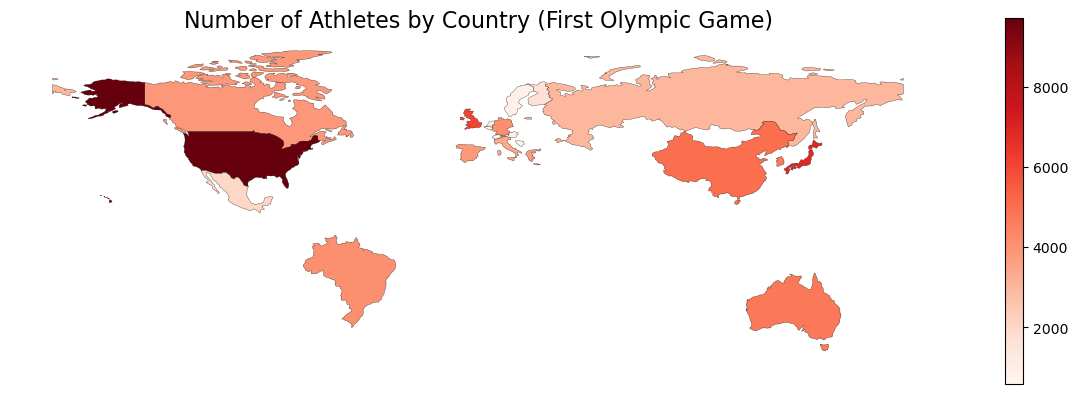

In [8]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=100)

world.plot(
    column="Athlete_Count",
    cmap=cm.Reds,
    norm=norm,
    edgecolor="black",
    linewidth=0.2,
    legend=True,
    ax=ax,
)

ax.set_title("Number of Athletes by Country (First Olympic Game)", fontsize=16)

ax.axis("off")
plt.tight_layout()
plt.show()

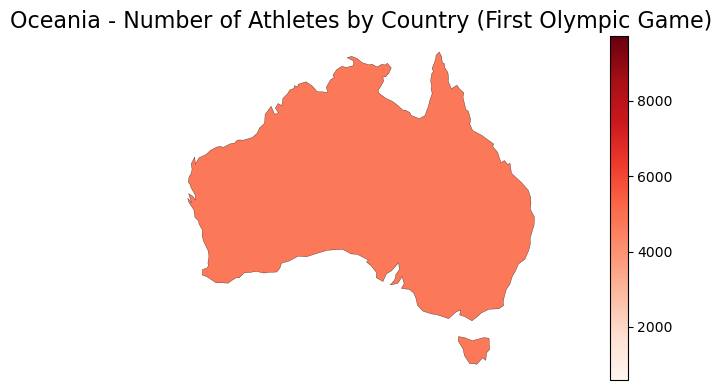

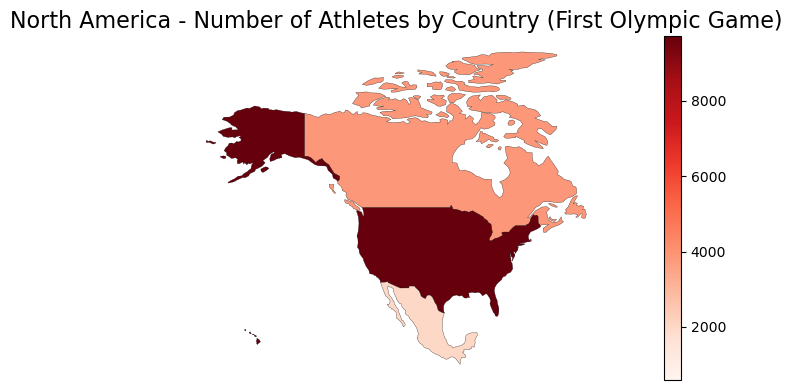

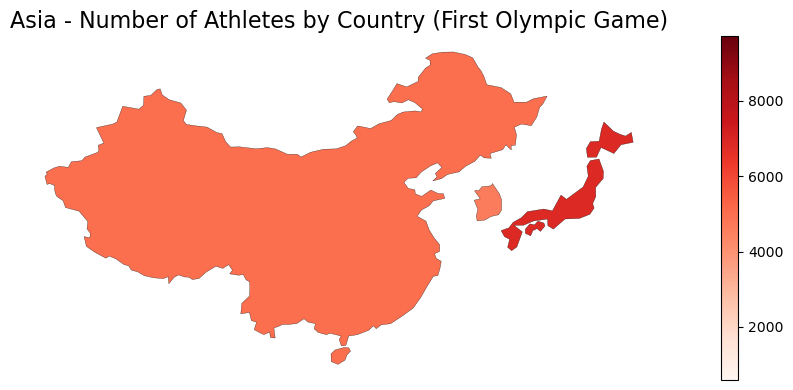

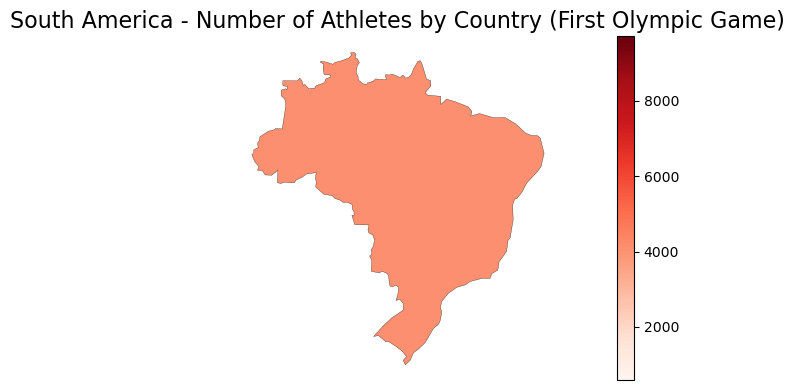

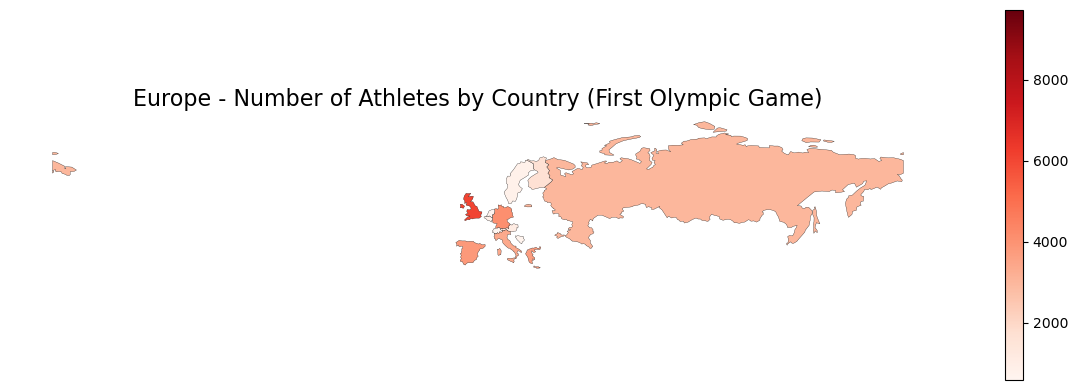

In [9]:
for continent in world["CONTINENT"].unique():
    world_continent = world[world["CONTINENT"] == continent]
    if (~world_continent["Athlete_Count"].isna()).any():
        fig, ax = plt.subplots(figsize=(12, 4), dpi=100)

        world_continent.plot(
            column="Athlete_Count",
            cmap=cm.Reds,
            norm=norm,
            edgecolor="black",
            linewidth=0.2,
            legend=True,
            ax=ax,
        )

        ax.set_title(
            f"{continent} - Number of Athletes by Country (First Olympic Game)", fontsize=16
        )

        ax.axis("off")
        plt.tight_layout()
        plt.show()